<a href="https://colab.research.google.com/github/carolinagalvisl/01.01-PROYECTO-KAGGLE/blob/main/01%20-%20exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

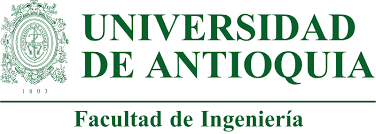

# <font color='056938'> **01.01 - PROYECTO KAGGLE - </font> <font color='8EC044'> Entrega 1** </font>

## <font color='157699'> **Paso 1:** </font>

In [15]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

## <font color='157699'> **Paso 2: Descargar datos directamente desde Kaggle** </font>

- Se creo un archivo kaggle.jsoncon con mi token de autenticación (en kaggle $\to$ Hago clic en el icono de usuario en la parte superior derecha $\to$
ajustes $\to$ API crea un nuevo token);

- Subirlo a este espacio de trabajo del cuaderno;

- Y ejecutar la siguiente celda.

In [16]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download --force udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.06GB/s]


## <font color='157699'> **Paso 3: Descomprimir e inspeccionar datos** </font>

Se descomprime el fichero.

In [17]:
!unzip udea*.zip > /dev/null

In [18]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


## <font color='157699'> **Paso 4: Se carga `train.csv` y `test.csv` con la librería `Pandas`** </font>

In [19]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
x = pd.read_csv("test.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 21)


Se muestran los datos del archivo de entrenamiento.

In [20]:
z.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


Se muestran los datos del archivo de prueba.

In [21]:
x.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286


## <font color='157699'> **Paso 5: Explaración de datos usando `train.CSV` y `test.CSV`** </font>

Se muestran los 10 primeros elementos del archivo de entrenamiento.

In [22]:
z.head(10)

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,Más de 7 millones,Menos de 10 horas,Estrato 5,Si,Educación profesional completa,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,medio-alto,0.553,0.142,0.248,0.175
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional incompleta,Si,...,N,Si,Si,Si,Técnica o tecnológica completa,alto,0.242,0.299,0.267,0.308
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Primaria incompleta,Si,...,N,Si,No,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.238,0.316,0.286,0.290
8,257869,20212,INGENIERIA INDUSTRIAL,ATLANTICO,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 1,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Educación profesional incompleta,medio-bajo,0.147,0.407,0.212,0.328
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,Si,Postgrado,Si,...,N,Si,Si,Si,Postgrado,alto,0.535,0.122,0.257,0.167


Se muestran los 10 últimos elementos del archivo entrenamiento.

In [23]:
z.tail(10)

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
692490,403947,20195,PSICOLOGIA,BOLIVAR,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.236,0.304,0.268,0.305
692491,157529,20212,LICENCIATURA EN EDUCACION PREESCOLAR,BOYACA,No pagó matrícula,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional completa,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,medio-alto,0.224,0.292,0.273,0.320
692492,584597,20183,LICENCIATURA EN LENGUA CASTELLANA Y LITERATURA,NARIÑO,Menos de 500 mil,Menos de 10 horas,Estrato 1,Si,Primaria incompleta,No,...,N,Si,Si,Si,Primaria incompleta,alto,0.163,0.400,0.254,0.294
692493,725949,20203,DERECHO,CORDOBA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Educación profesional incompleta,Si,...,N,No,No,Si,Educación profesional completa,medio-alto,0.173,0.410,0.212,0.328
692494,649690,20212,LICENCIATURA EN EDUCACION BASICA CON ENFASIS E...,NORTE SANTANDER,Menos de 500 mil,Entre 21 y 30 horas,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) completa,bajo,0.312,0.209,0.290,0.265
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328
692499,933374,20195,PSICOLOGIA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Más de 30 horas,Estrato 4,Si,Secundaria (Bachillerato) completa,Si,...,N,No,Si,Si,Técnica o tecnológica completa,alto,0.487,0.180,0.251,0.187


Se muestran los 10 primeros elementos del archivo de prueba.

In [24]:
x.head (10)

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286
5,58495,20183,ADMINISTRACION AGROPECUARIA,VALLE,Entre 500 mil y menos de 1 millón,Más de 30 horas,Estrato 1,Si,Ninguno,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) completa,0.132,0.396,0.239,0.297
6,705444,20195,INGENIERIA CIVIL,SANTANDER,Menos de 500 mil,0,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Técnica o tecnológica completa,0.307,0.229,0.275,0.276
7,557548,20183,INGENIERÍA MECÁNICA,BOGOTÁ,Más de 7 millones,Menos de 10 horas,Estrato 4,Si,Postgrado,Si,Si,N,No,Si,Si,Postgrado,0.469,0.169,0.298,0.214
8,519909,20195,INGENIERÍA DE SISTEMAS,ATLANTICO,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 2,No,Secundaria (Bachillerato) completa,Si,No,N,No,Si,No,Secundaria (Bachillerato) completa,0.202,0.298,0.290,0.281
9,832058,20183,ECONOMIA,BOGOTÁ,Entre 500 mil y menos de 1 millón,Entre 21 y 30 horas,Estrato 2,Si,Técnica o tecnológica completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,0.212,0.272,0.302,0.309


Se muestran los 10 últimos elementos del archivo de prueba.

In [25]:
x.tail(10)

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
296776,718143,20203,INGENIERIA INDUSTRIAL,BOLIVAR,Entre 1 millón y menos de 2.5 millones,0,Estrato 2,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,0.200,0.315,0.298,0.284
296777,516832,20195,MERCADEO,ANTIOQUIA,Más de 7 millones,Más de 30 horas,Estrato 6,Si,Secundaria (Bachillerato) incompleta,Si,Si,N,No,Si,Si,Secundaria (Bachillerato) completa,0.618,0.148,0.199,0.149
296778,438542,20183,INGENIERIA AMBIENTAL,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 5,NaN,Educación profesional completa,Si,Si,N,No,Si,NaN,Educación profesional completa,0.540,0.152,0.247,0.181
296779,977130,20212,ADMINISTRACIÓN DE EMPRESAS,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,No,N,Si,Si,Si,Primaria incompleta,0.325,0.237,0.272,0.258
296780,229699,20195,CONTADURÍA PÚBLICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 2,Si,Ninguno,Si,No,N,No,Si,Si,Técnica o tecnológica incompleta,0.236,0.300,0.284,0.281
296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Primaria incompleta,Si,Si,N,Si,Si,Si,Primaria incompleta,0.168,0.410,0.235,0.300
296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,Estrato 4,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,0.471,0.184,0.264,0.193
296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Educación profesional completa,0.292,0.249,0.276,0.256
296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,0.305,0.219,0.310,0.260
296785,792650,20212,INGENIERIA INDUSTRIAL,BOYACA,No pagó matrícula,0,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,Si,N,No,Si,Si,Secundaria (Bachillerato) completa,0.305,0.245,0.277,0.270


Se verifica que los ID de prueba sean todos distintos.

In [26]:
x ['ID'].nunique()

296786

Cambiamos el index por los ID ya que son unicos, en el dataframe del archivo de prueba ya estaba seteado el index 'ID'

In [28]:
z.set_index('ID', inplace=True)
x.set_index('ID', inplace=True)

Observamos como quedaron nuestros dataframes

In [29]:
z.head()

,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
ID,,,,,,,,,,,,,,,,,,,,
904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [30]:
x.head()

,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
ID,,,,,,,,,,,,,,,,,,,
550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286


Buscamos conocer qué tipo de dato tiene cada una de las columnas y al correrlo observamos que hay 11 columnas, 1 de tipo entero y 10 de tipo object.

In [31]:
z.dtypes

,0
PERIODO_ACADEMICO,int64
E_PRGM_ACADEMICO,object
E_PRGM_DEPARTAMENTO,object
E_VALORMATRICULAUNIVERSIDAD,object
E_HORASSEMANATRABAJA,object
F_ESTRATOVIVIENDA,object
F_TIENEINTERNET,object
F_EDUCACIONPADRE,object
F_TIENELAVADORA,object
F_TIENEAUTOMOVIL,object


In [32]:
x.dtypes

,0
PERIODO_ACADEMICO,int64
E_PRGM_ACADEMICO,object
E_PRGM_DEPARTAMENTO,object
E_VALORMATRICULAUNIVERSIDAD,object
E_HORASSEMANATRABAJA,object
F_ESTRATOVIVIENDA,object
F_TIENEINTERNET,object
F_EDUCACIONPADRE,object
F_TIENELAVADORA,object
F_TIENEAUTOMOVIL,object


Con el siguiente bloque de código podemos saber si hay datos faltantes. Para cada columna hay 692500 datos; al correr el código se observa que no falta ningún punto de datos.

In [33]:
z.notnull().count()

,0
PERIODO_ACADEMICO,692500
E_PRGM_ACADEMICO,692500
E_PRGM_DEPARTAMENTO,692500
E_VALORMATRICULAUNIVERSIDAD,692500
E_HORASSEMANATRABAJA,692500
F_ESTRATOVIVIENDA,692500
F_TIENEINTERNET,692500
F_EDUCACIONPADRE,692500
F_TIENELAVADORA,692500
F_TIENEAUTOMOVIL,692500


Observamos cuantos departamentos distintos hay.

In [35]:
z ['E_PRGM_DEPARTAMENTO'].unique()

array(['BOGOTÁ', 'ATLANTICO', 'SANTANDER', 'ANTIOQUIA', 'HUILA', 'SUCRE',
       'CAQUETA', 'CUNDINAMARCA', 'BOLIVAR', 'TOLIMA', 'VALLE', 'QUINDIO',
       'RISARALDA', 'CORDOBA', 'META', 'LA GUAJIRA', 'BOYACA', 'NARIÑO',
       'CAUCA', 'NORTE SANTANDER', 'CESAR', 'PUTUMAYO', 'CALDAS',
       'MAGDALENA', 'CHOCO', 'CASANARE', 'ARAUCA', 'GUAVIARE', 'AMAZONAS',
       'VAUPES', 'SAN ANDRES'], dtype=object)

In [36]:
z ['E_VALORMATRICULAUNIVERSIDAD'].unique()

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula', nan], dtype=object)

Observamos cuantos rangos de horas de estudio distintos hay.

In [37]:
z ['E_HORASSEMANATRABAJA'].unique()

array(['Menos de 10 horas', '0', 'Más de 30 horas', 'Entre 21 y 30 horas',
       'Entre 11 y 20 horas', nan], dtype=object)

Como hay lugares de la columna con NaN, estos se van a reemplazar por 'No sabe, No responde'

In [38]:
z ['E_HORASSEMANATRABAJA'].fillna(value = 'No sabe, No responde', inplace = True)

/tmp/ipython-input-3658629150.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z ['E_HORASSEMANATRABAJA'].fillna(value = 'No sabe, No responde', inplace = True)


Verificamos que haya quedado guardado

In [39]:
z ['E_HORASSEMANATRABAJA'].unique()

array(['Menos de 10 horas', '0', 'Más de 30 horas', 'Entre 21 y 30 horas',
       'Entre 11 y 20 horas', 'No sabe, No responde'], dtype=object)

Miramos que mas datos faltantes hay por columna.

In [40]:
z.isna().sum()

,0
PERIODO_ACADEMICO,0
E_PRGM_ACADEMICO,0
E_PRGM_DEPARTAMENTO,0
E_VALORMATRICULAUNIVERSIDAD,6287
E_HORASSEMANATRABAJA,0
F_ESTRATOVIVIENDA,32137
F_TIENEINTERNET,26629
F_EDUCACIONPADRE,23178
F_TIENELAVADORA,39773
F_TIENEAUTOMOVIL,43623


Reemplazamos los datos faltantes por valores dependiendo de cada columna, así:

E_VALORMATRICULAUNIVERSIDAD = 'No sabe, No responde'

F_ESTRATOVIVIENDA = 'Sin Estrato'

F_TIENEINTERNET = 'No'

F_EDUCACIONPADRE = 'No Aplica'

F_EDUCACIONMADRE = 'No Aplica'

E_PAGOMATRICULAPROPIO = 'No sabe, No responde'

In [42]:
z ['E_VALORMATRICULAUNIVERSIDAD'].fillna(value='No sabe, No responde', inplace=True)
z ['F_ESTRATOVIVIENDA'].fillna(value='Sin Estrato', inplace=True)
z ['F_TIENEINTERNET'].fillna(value='No', inplace=True)
z ['F_EDUCACIONPADRE'].fillna(value='No Aplica', inplace=True)
z ['F_EDUCACIONMADRE'].fillna(value='No Aplica', inplace=True)
z ['E_PAGOMATRICULAPROPIO'].fillna(value='No sabe, No responde', inplace=True)

/tmp/ipython-input-2312016654.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z ['E_VALORMATRICULAUNIVERSIDAD'].fillna(value='No sabe, No responde', inplace=True)
/tmp/ipython-input-2312016654.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

Verificamos que haya quedado guardado

In [43]:
z ['E_VALORMATRICULAUNIVERSIDAD'].unique()
z ['F_ESTRATOVIVIENDA'].unique()
z ['F_TIENEINTERNET'].unique()
z ['F_EDUCACIONPADRE'].unique()
z ['F_EDUCACIONMADRE'].unique()
z ['E_PAGOMATRICULAPROPIO'].unique()

array(['No', 'Si', 'No sabe, No responde'], dtype=object)

Ahora vamos a mirar cuantos estudiantes hay por localidades.

In [44]:
z.groupby('E_PRGM_DEPARTAMENTO').count()['E_PRGM_ACADEMICO']

,E_PRGM_ACADEMICO
E_PRGM_DEPARTAMENTO,
AMAZONAS,40
ANTIOQUIA,83607
ARAUCA,589
ATLANTICO,41020
BOGOTÁ,282159
BOLIVAR,20629
BOYACA,14048
CALDAS,11640
CAQUETA,2659


Se muestra una gráfica con la cantidad de estudiantes por departamento, como era de esperarse, la mayoría de estudiantes son de los departamentos mas desarrollados, los cuales son en orden descendente: Bogotá, Antioquia, Valle, Atlantico y Santander.

<Axes: xlabel='E_PRGM_DEPARTAMENTO'>

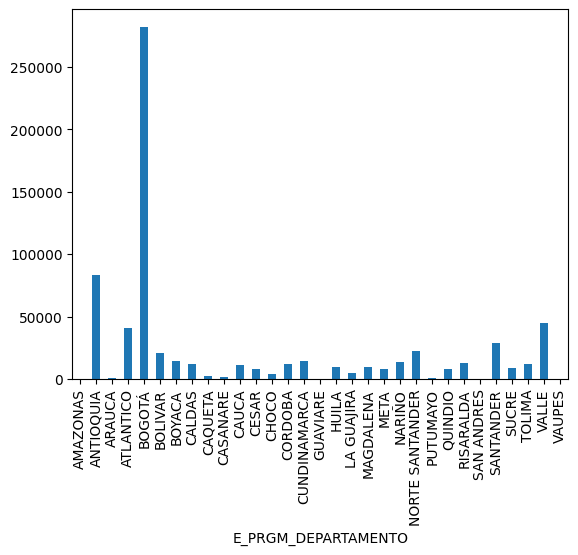

In [45]:
z.groupby('E_PRGM_DEPARTAMENTO').count()['E_PRGM_ACADEMICO'].plot(y='E_PRGM_ACADEMICO', kind='bar')

Ahora vamos a observar la cantidad de estudiantes por clase.

In [46]:
z.groupby('E_PRGM_ACADEMICO').count()['E_PRGM_DEPARTAMENTO']

,E_PRGM_DEPARTAMENTO
E_PRGM_ACADEMICO,
3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,69
ACTIVIDAD FISICA Y DEPORTE,162
ACUICULTURA,79
ADMINISTRACION,117
ADMINISTRACION FINANCIERA,74
...,...
TRABAJO SOCIAL,12686
TRADUCCION INGLES-FRANCES-ESPAÑOL,68
TURISMO,222


Observamos el programa academico con menos personas inscritas.

In [47]:
z.groupby('E_PRGM_ACADEMICO').count()['E_PRGM_DEPARTAMENTO'].idxmin(), z.groupby('E_PRGM_ACADEMICO').count()['E_PRGM_DEPARTAMENTO'].min()

('ADMINISTRACION DE COMERCIO EXTERIOR', 1)

Observamos el programa academico con más personas inscritas

In [48]:
z.groupby('E_PRGM_ACADEMICO').count()['E_PRGM_DEPARTAMENTO'].idxmax(),  z.groupby('E_PRGM_ACADEMICO').count()['E_PRGM_DEPARTAMENTO'].max()

('DERECHO', 53244)

Ahora, vamos a observar cuantos estudiantes hay de cada clase por departamento.

In [49]:
pd.crosstab(z ['E_PRGM_DEPARTAMENTO'], z ['E_PRGM_ACADEMICO'], margins = True)

E_PRGM_ACADEMICO,3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,ACTIVIDAD FISICA Y DEPORTE,ACUICULTURA,ADMINISTRACION,ADMINISTRACION FINANCIERA,ADMINISTRACION & SERVICIO,ADMINISTRACION AERONAUTICA,ADMINISTRACION AGROPECUARIA,ADMINISTRACION AMBIENTAL,ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES,...,TERAPIA CARDIORRESPIRATORIA,TERAPIA OCUPACIONAL,TERAPIA RESPIRATORIA,TERAPIAS PSICOSOCIALES,TRABAJO SOCIAL,TRADUCCION INGLES-FRANCES-ESPAÑOL,TURISMO,URBANISMO,ZOOTECNIA,All
E_PRGM_DEPARTAMENTO,,,,,,,,,,,,,,,,,,,,,
AMAZONAS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
ANTIOQUIA,69,162,0,0,0,0,0,0,0,0,...,0,0,143,0,1216,68,0,0,241,83607
ARAUCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,589
ATLANTICO,0,0,0,0,0,0,0,0,38,0,...,0,63,0,0,382,0,0,0,0,41020
BOGOTÁ,0,0,0,0,0,0,0,0,230,249,...,88,260,164,27,3283,0,149,7,589,282159
BOLIVAR,0,0,0,100,0,0,0,0,0,0,...,0,0,0,0,594,0,0,0,0,20629
BOYACA,0,0,0,0,0,0,0,0,0,0,...,0,0,31,0,272,0,0,0,0,14048
CALDAS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,212,0,0,0,0,11640
CAQUETA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2659


Ahora observaremos la incidencia de la educación del padre con el rendimiento.

In [50]:
pd.crosstab(z ['F_EDUCACIONPADRE'], z ['RENDIMIENTO_GLOBAL'], margins = True)

RENDIMIENTO_GLOBAL,alto,bajo,medio-alto,medio-bajo,All
F_EDUCACIONPADRE,,,,,
Educación profesional completa,33397,13733,20317,15670,83117
Educación profesional incompleta,9473,5131,6879,5601,27084
Ninguno,2091,9714,3961,6242,22008
No Aplica,7396,9763,7748,7500,32407
No sabe,5060,3068,4626,3838,16592
Postgrado,23856,4508,9732,6073,44169
Primaria completa,8838,17647,13359,16114,55958
Primaria incompleta,16839,42457,28937,37442,125675
Secundaria (Bachillerato) completa,30485,30090,34345,33369,128289


Ahora observaremos la incidencia de la educación de la madre con el rendimiento.

In [51]:
pd.crosstab(z ['F_EDUCACIONMADRE'], z ['RENDIMIENTO_GLOBAL'], margins = True)

RENDIMIENTO_GLOBAL,alto,bajo,medio-alto,medio-bajo,All
F_EDUCACIONMADRE,,,,,
Educación profesional completa,35790,13210,20689,15637,85326
Educación profesional incompleta,8232,4069,5714,4455,22470
Ninguno,1116,7111,2210,4046,14483
No Aplica,5516,8513,5795,5758,25582
No sabe,761,824,728,704,3017
Postgrado,23581,5001,10792,6872,46246
Primaria completa,8117,18350,13244,16414,56125
Primaria incompleta,11522,36434,21615,29849,99420
Secundaria (Bachillerato) completa,32663,33691,37846,37544,141744


Incidencia del estrato en el valor de matricula pagado en la universidad.

In [52]:
pd.crosstab(z ['E_VALORMATRICULAUNIVERSIDAD'], z ['F_ESTRATOVIVIENDA'], margins = True)

F_ESTRATOVIVIENDA,Estrato 1,Estrato 2,Estrato 3,Estrato 4,Estrato 5,Estrato 6,Sin Estrato,All
E_VALORMATRICULAUNIVERSIDAD,,,,,,,,
Entre 1 millón y menos de 2.5 millones,35321,78625,63786,12845,2971,961,9539,204048
Entre 2.5 millones y menos de 4 millones,15540,45263,45239,11314,3081,1049,5944,127430
Entre 4 millones y menos de 5.5 millones,5597,20307,27477,9599,2625,1046,3085,69736
Entre 5.5 millones y menos de 7 millones,2116,8497,14398,7429,2963,1341,1746,38490
Entre 500 mil y menos de 1 millón,19022,31318,19501,3778,811,254,4020,78704
Menos de 500 mil,24910,30316,16698,2247,529,241,5322,80263
Más de 7 millones,2944,9660,18217,16910,10075,7374,2834,68014
No pagó matrícula,6126,7587,3887,643,194,49,1042,19528
"No sabe, No responde",415,1098,1482,749,359,290,1894,6287


Cantidad de estudiantes por valor de matricula pagado en la universidad.

In [53]:
z.groupby('E_VALORMATRICULAUNIVERSIDAD').count()['E_PRGM_ACADEMICO']

,E_PRGM_ACADEMICO
E_VALORMATRICULAUNIVERSIDAD,
Entre 1 millón y menos de 2.5 millones,204048
Entre 2.5 millones y menos de 4 millones,127430
Entre 4 millones y menos de 5.5 millones,69736
Entre 5.5 millones y menos de 7 millones,38490
Entre 500 mil y menos de 1 millón,78704
Menos de 500 mil,80263
Más de 7 millones,68014
No pagó matrícula,19528
"No sabe, No responde",6287


Gráfico de barras que muestra la información anterior.

<Axes: xlabel='E_VALORMATRICULAUNIVERSIDAD'>

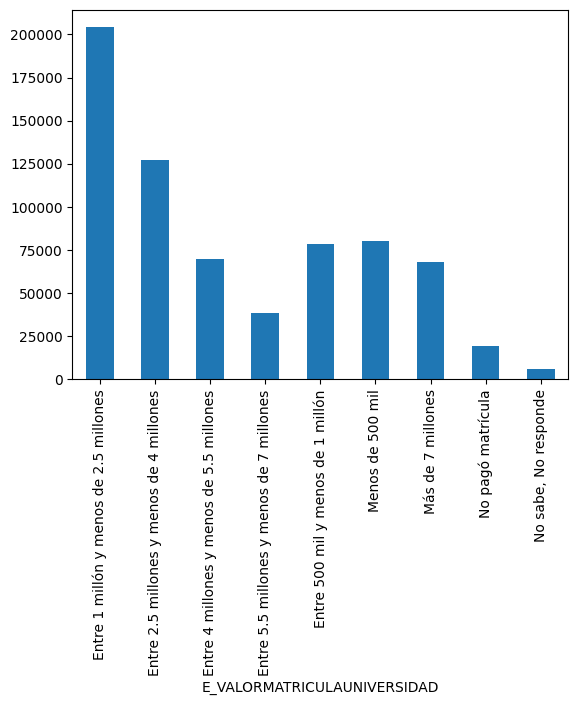

In [54]:
z.groupby('E_VALORMATRICULAUNIVERSIDAD').count()['E_PRGM_ACADEMICO'].plot(y='E_PRGM_ACADEMICO', kind='bar')

## <font color='157699'> **Paso 6: Inspeccionar visualmente si los atributos del Modelo 1, tienen un comportamiento distintivo con respecto a lo que se quiere predecir** </font>

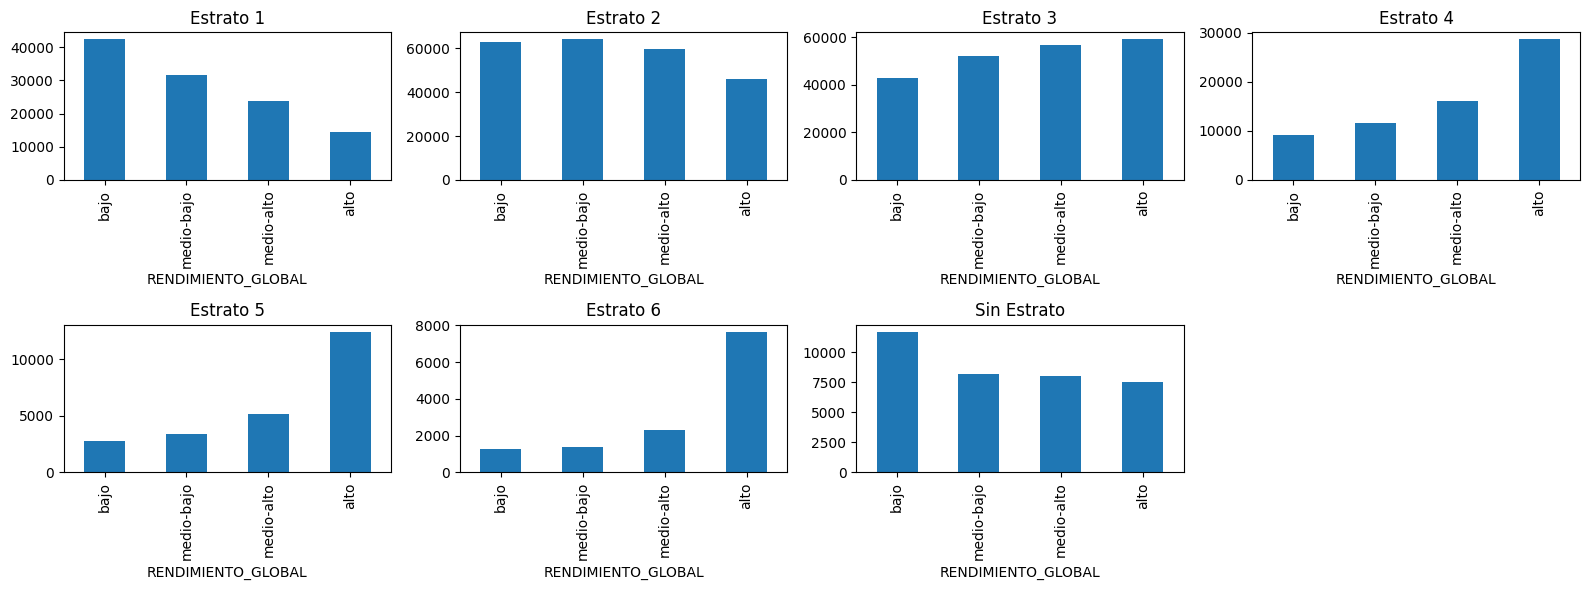

In [55]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.F_ESTRATOVIVIENDA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.F_ESTRATOVIVIENDA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

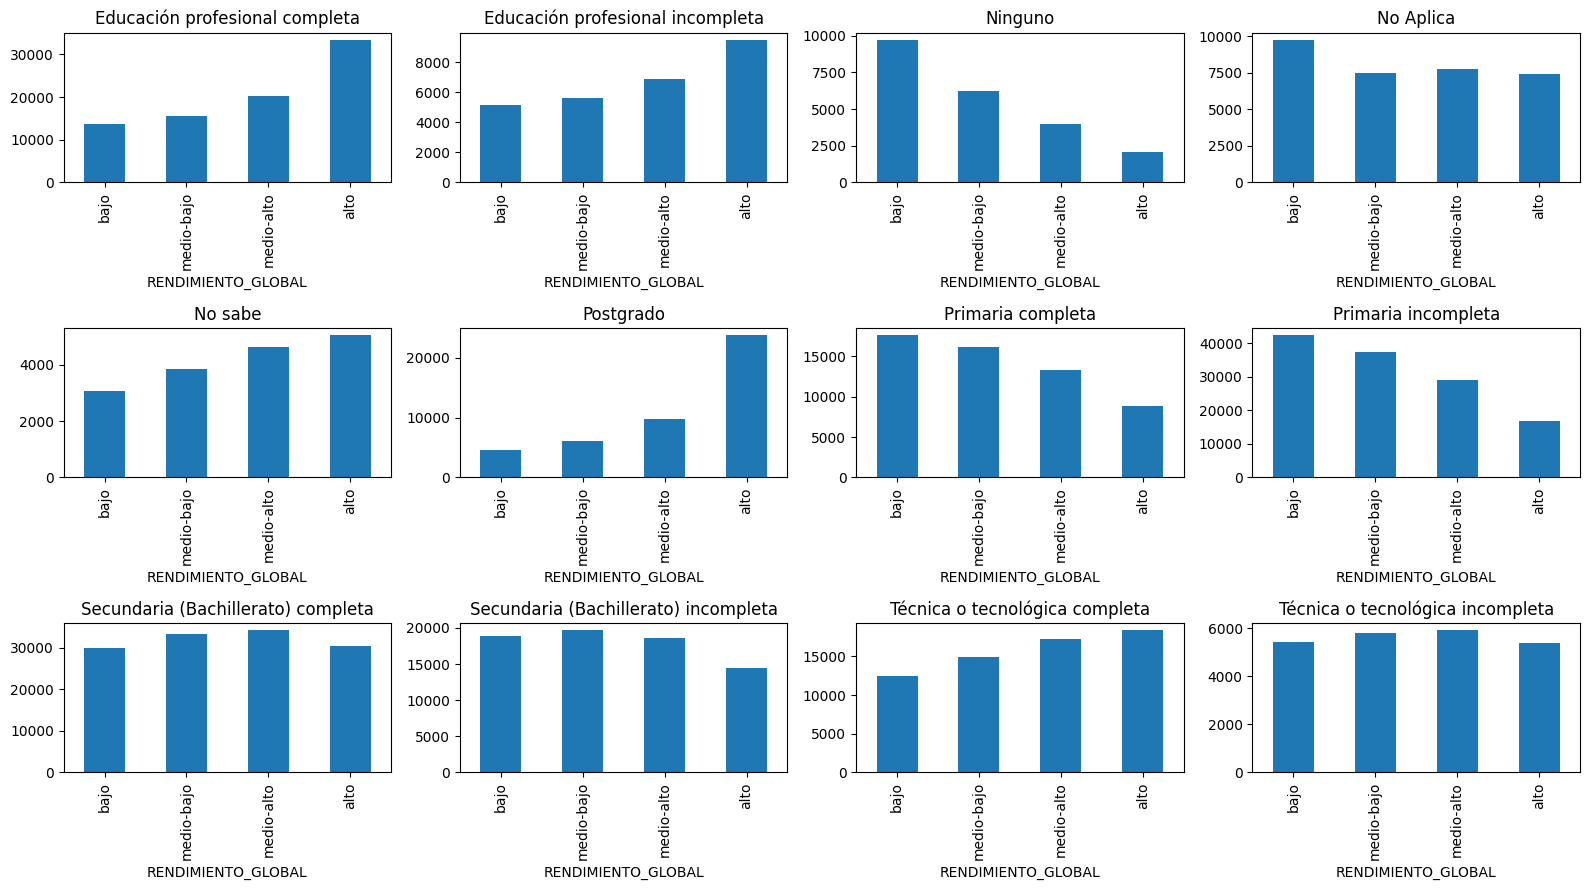

In [56]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.F_EDUCACIONPADRE.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.F_EDUCACIONPADRE==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

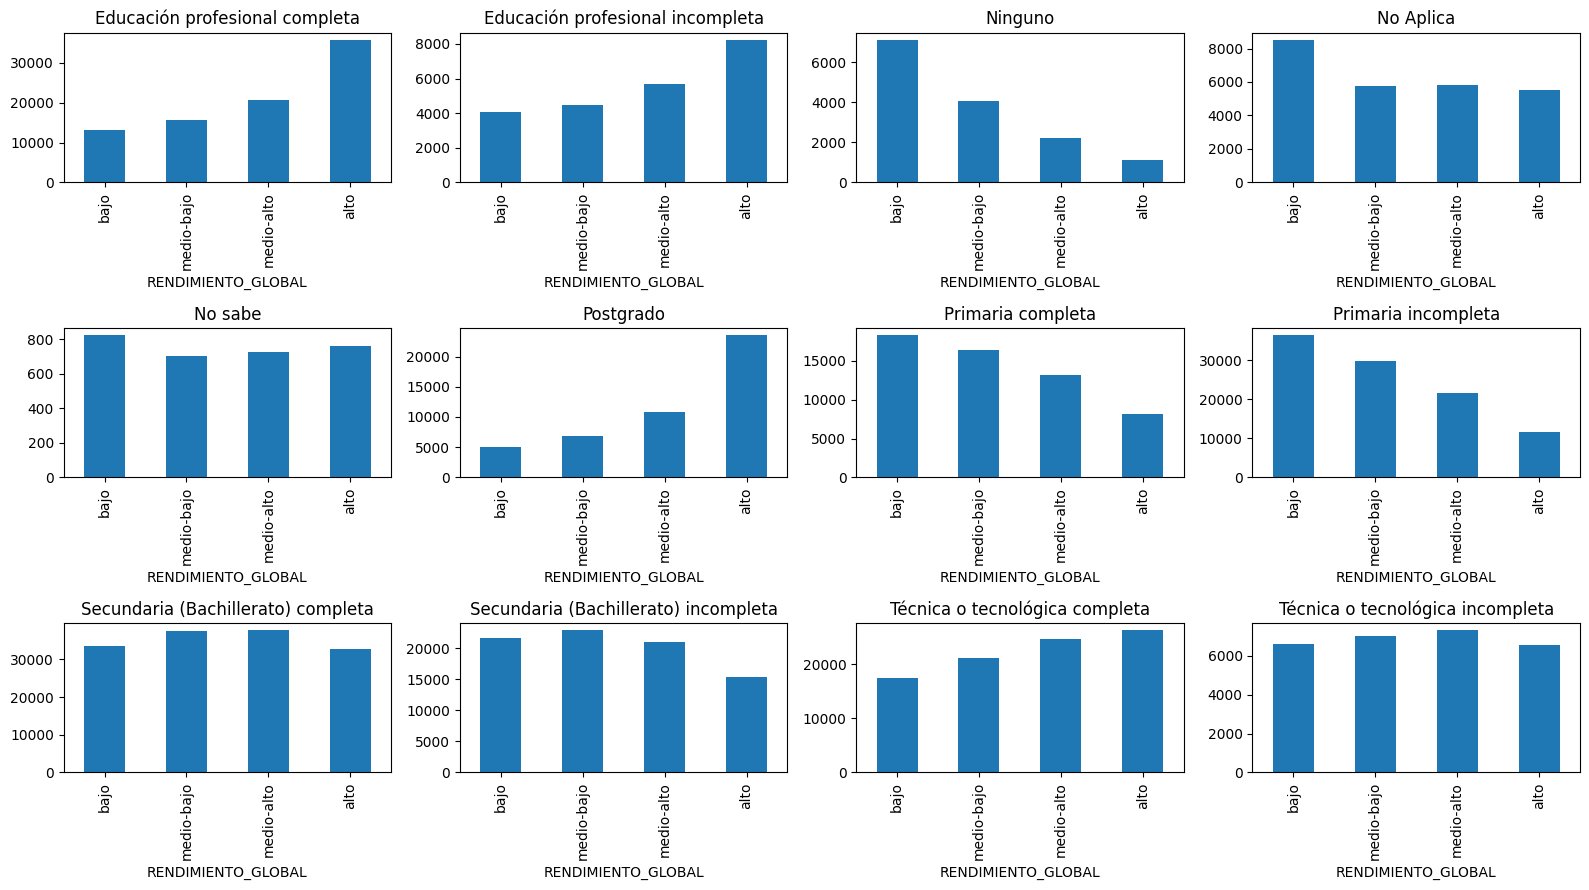

In [57]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.F_EDUCACIONMADRE.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.F_EDUCACIONMADRE==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

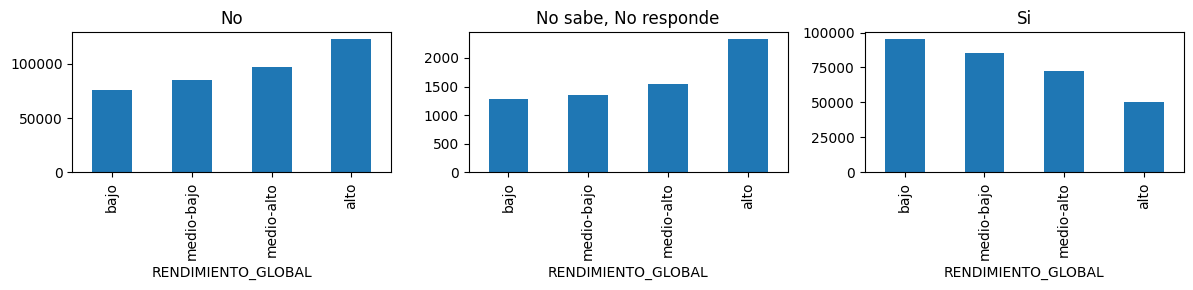

In [58]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.E_PAGOMATRICULAPROPIO.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.E_PAGOMATRICULAPROPIO==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

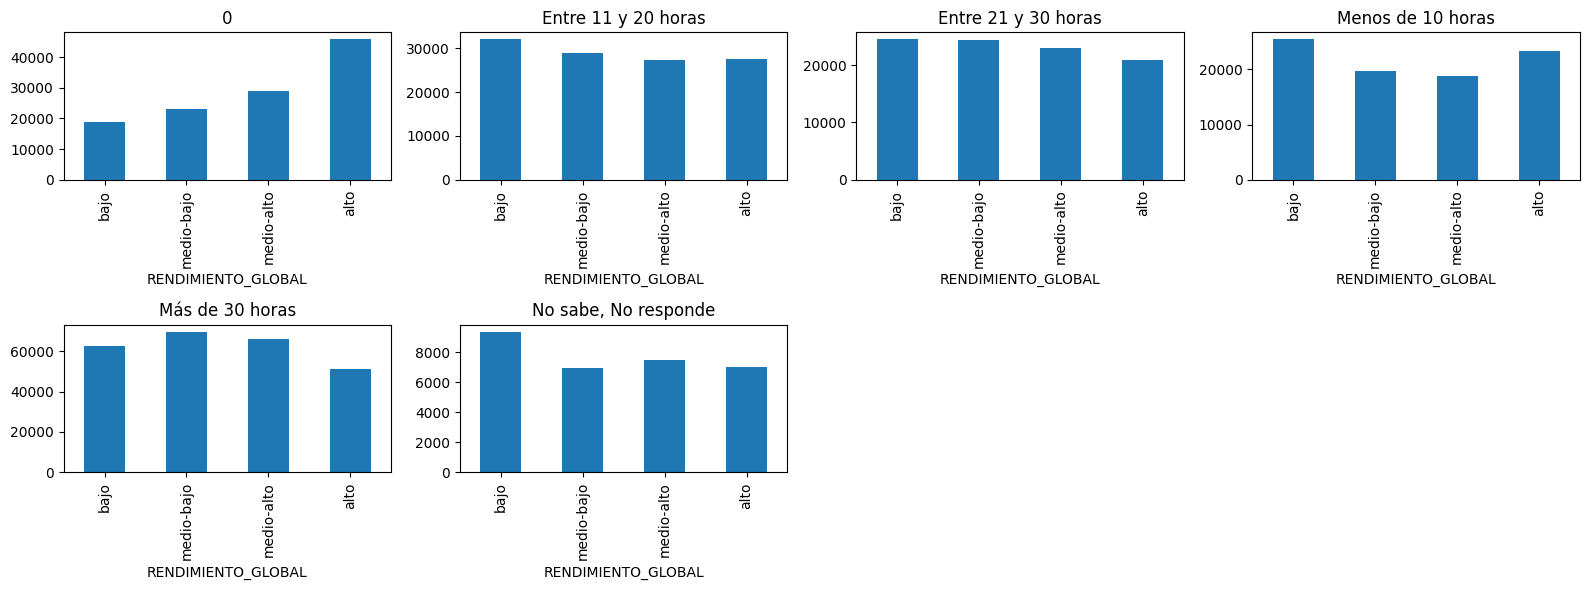

In [59]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.E_HORASSEMANATRABAJA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.E_HORASSEMANATRABAJA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

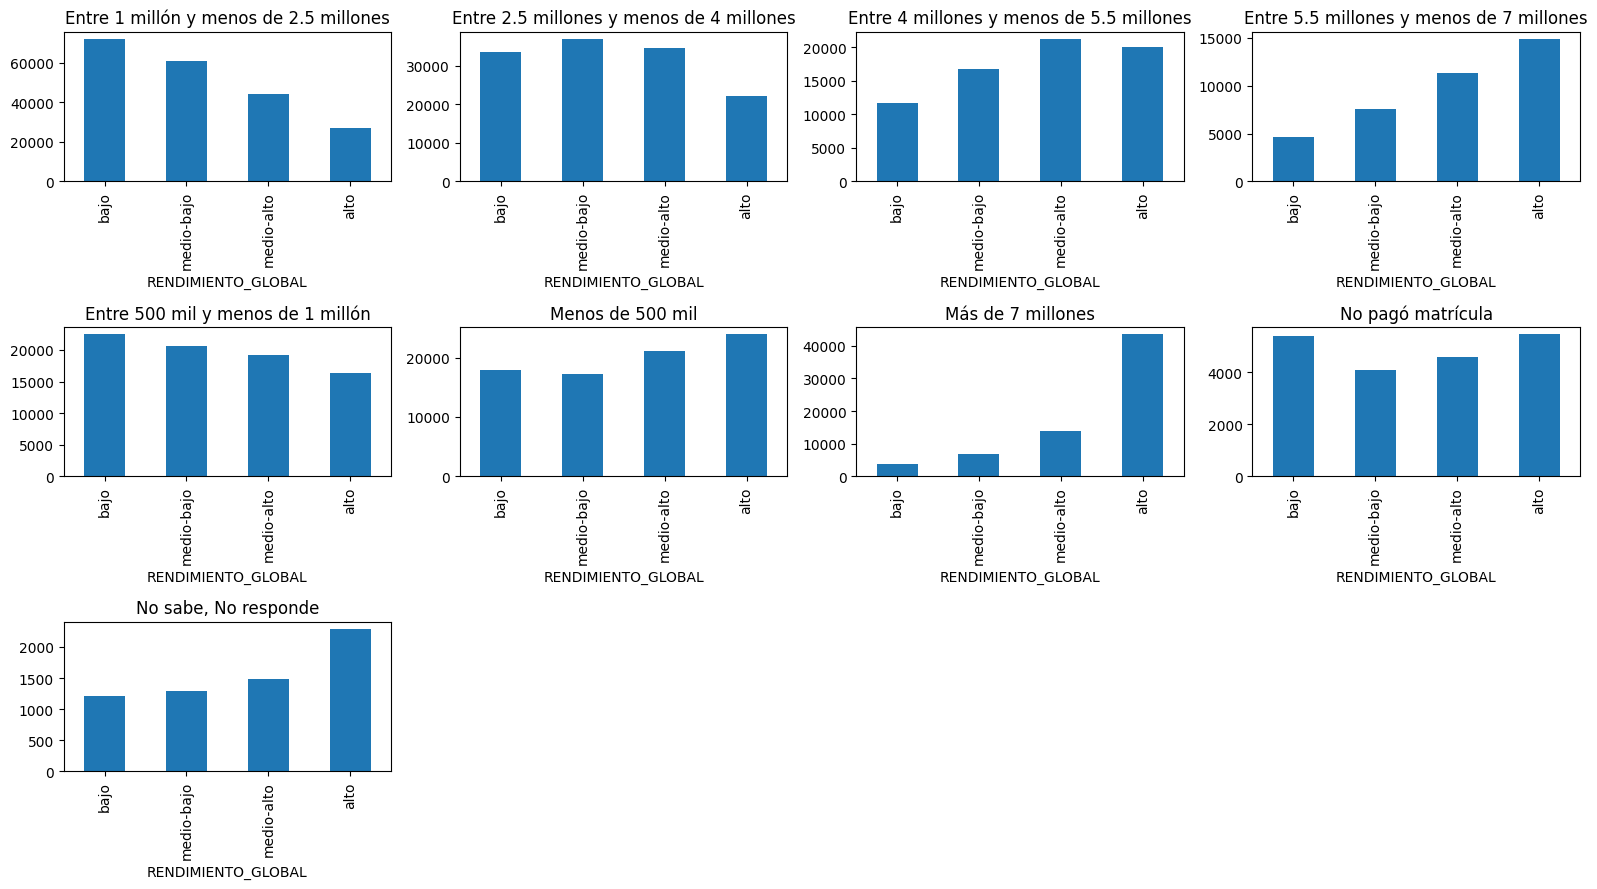

In [60]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.E_VALORMATRICULAUNIVERSIDAD.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.E_VALORMATRICULAUNIVERSIDAD==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)